# **Unziping image into drive**

In [ ]:
!unzip  /content/drive/MyDrive/text2human/images.zip  -d /content/drive/MyDrive/text2human

unzip:  cannot find or open /content/drive/MyDrive/text2human/images.zip, /content/drive/MyDrive/text2human/images.zip.zip or /content/drive/MyDrive/text2human/images.zip.ZIP.


check number images

In [ ]:
import os

dir_image = "/content/drive/MyDrive/text2human/images/"


files_image = os.listdir(dir_image)
num_image_files = len(files_image)
print("num of image",num_image_files)

num of image 27672


# **LoadCAPTIONS.JSON**

In [ ]:
import json


with open('/content/drive/MyDrive/captions.json', 'r', encoding='utf-8') as f:
  captions_data = json.load(f)


Split caption to key : value
                 image_id : description  

In [ ]:
def split_dict(d):

    keys = list(d.keys())
    values = list(d.values())
    return keys, values


data = captions_data

image_ids, descriptions = split_dict(data)


print(f"Image IDs: {image_ids[:1]}")
print(f"Descriptions: {descriptions[:1]}")

Image IDs: ['MEN-Denim-id_00000080-01_7_additional.jpg']
Descriptions: ['The lower clothing is of long length. The fabric is cotton and it has plaid patterns.']


In [ ]:
image_caption_dict = dict(zip(image_ids, descriptions))

def create_dataset(image_caption_dict, image_folder):

    dataset = []
    for image_id, caption in image_caption_dict.items():
        # image with image_id
        image_file = os.path.join(image_folder, image_id)
        if os.path.isfile(image_file):
            # Pair the image file with its caption
            dataset.append((image_file, caption))
    return dataset

import os
dataset = create_dataset(image_caption_dict, '/content/drive/MyDrive/text2human/images')


In [ ]:
for i in range(5):
    print(f"pair: {dataset[i]}")
    print("---")

pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000080-01_7_additional.jpg', 'The lower clothing is of long length. The fabric is cotton and it has plaid patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-01_7_additional.jpg', 'His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-02_7_additional.jpg', 'His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.')
---
pair: ('/content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-03_7_additional.jpg', 'His shirt has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The person wears a long pants. The pa

In [ ]:
def split_dataset(dataset):
    # Initialize two empty lists
    image_list = []
    caption_list = []

    # Loop through the dataset and append the items to the respective lists
    for item in dataset:
        image_list.append(item[0])  # Append the image file path
        caption_list.append(item[1])  # Append the caption

    return image_list, caption_list

# Use the function
image_list, caption_list = split_dataset(dataset)


In [ ]:
for i in range(5):
    print(f"Image: {image_list[i]}")
    print(f"Caption: {caption_list[i]}")
    print("---")


Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000080-01_7_additional.jpg
Caption: The lower clothing is of long length. The fabric is cotton and it has plaid patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-01_7_additional.jpg
Caption: His tank top has sleeves cut off, cotton fabric and pure color patterns. The neckline of it is round. The pants this man wears is of long length. The pants are with cotton fabric and pure color patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-02_7_additional.jpg
Caption: His sweater has long sleeves, cotton fabric and stripe patterns. The neckline of it is lapel. The gentleman wears a long pants. The pants are with cotton fabric and solid color patterns.
---
Image: /content/drive/MyDrive/text2human/images/MEN-Denim-id_00000089-03_7_additional.jpg
Caption: His shirt has short sleeves, cotton fabric and pure color patterns. It has a crew neckline. The person wears a long

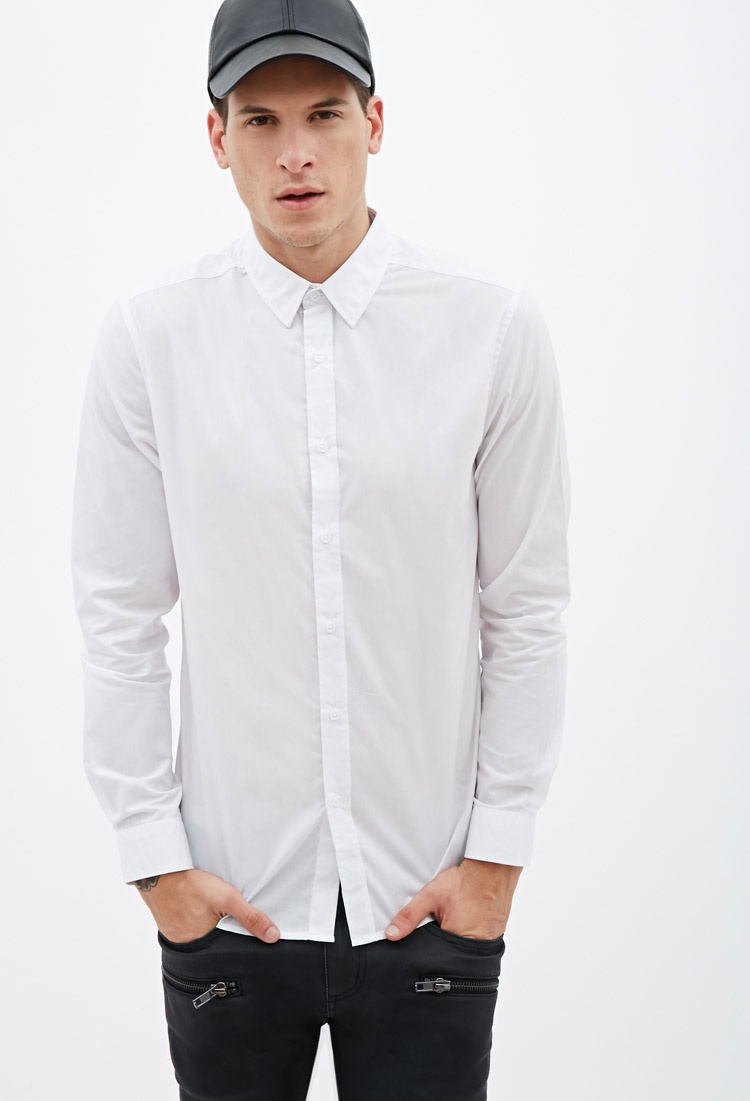

The sweater this man wears has long sleeves and its fabric is cotton. The pattern of it is pure color. It has a lapel neckline. This person has a hat in his head.


In [ ]:
from IPython.display import display, Image
import random

# Choose a random index
index = random.randint(0, len(image_list) - 1)

# Get the image file and caption using the random index
image_file = image_list[index]
caption = caption_list[index]

# Display the image
display(Image(filename=image_file))

# Print the caption
print(caption)



# ***Cleaning dataset***

clean description

In [ ]:
def to_lower(text):
    return text.lower()

import string

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

from nltk.stem import PorterStemmer

def stem_words(text):
    stemmer = PorterStemmer()
    return " ".join([stemmer.stem(word) for word in text.split()])

import nltk
nltk.download('stopwords')

def clean_text(text):
    text = to_lower(text)
    text = remove_punctuation(text)
    text = stem_words(text)
    return text

cleaned_captions = [clean_text(caption) for caption in caption_list]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


post_process_wrong_tokens


In [ ]:
def post_process_wrong_tokens(tokens_list):
    processed_tokens_list = []

    for tokens in tokens_list:
        processed_tokens = []

        current_word = ''

        for token in tokens:
            if token.startswith('##'):

                if current_word == '':
                    current_word = processed_tokens.pop()

                current_word += token[2:]
            else:
                if current_word:
                    processed_tokens.append(current_word)
                    current_word = ''

                processed_tokens.append(token)


        if current_word:
            processed_tokens.append(current_word)


        processed_tokens_list.append(processed_tokens)

    return processed_tokens_list

BertTokenizer

In [ ]:
new_token = post_process_wrong_tokens(cleaned_captions)
for i in range(5):
    print(f"new: {new_token[i]}")

new: ['t', 'h', 'e', ' ', 'l', 'o', 'w', 'e', 'r', ' ', 'c', 'l', 'o', 't', 'h', ' ', 'i', 's', ' ', 'o', 'f', ' ', 'l', 'o', 'n', 'g', ' ', 'l', 'e', 'n', 'g', 't', 'h', ' ', 't', 'h', 'e', ' ', 'f', 'a', 'b', 'r', 'i', 'c', ' ', 'i', 's', ' ', 'c', 'o', 't', 't', 'o', 'n', ' ', 'a', 'n', 'd', ' ', 'i', 't', ' ', 'h', 'a', ' ', 'p', 'l', 'a', 'i', 'd', ' ', 'p', 'a', 't', 't', 'e', 'r', 'n']
new: ['h', 'i', ' ', 't', 'a', 'n', 'k', ' ', 't', 'o', 'p', ' ', 'h', 'a', ' ', 's', 'l', 'e', 'e', 'v', ' ', 'c', 'u', 't', ' ', 'o', 'f', 'f', ' ', 'c', 'o', 't', 't', 'o', 'n', ' ', 'f', 'a', 'b', 'r', 'i', 'c', ' ', 'a', 'n', 'd', ' ', 'p', 'u', 'r', 'e', ' ', 'c', 'o', 'l', 'o', 'r', ' ', 'p', 'a', 't', 't', 'e', 'r', 'n', ' ', 't', 'h', 'e', ' ', 'n', 'e', 'c', 'k', 'l', 'i', 'n', ' ', 'o', 'f', ' ', 'i', 't', ' ', 'i', 's', ' ', 'r', 'o', 'u', 'n', 'd', ' ', 't', 'h', 'e', ' ', 'p', 'a', 'n', 't', ' ', 't', 'h', 'i', ' ', 'm', 'a', 'n', ' ', 'w', 'e', 'a', 'r', ' ', 'i', 's', ' ', 'o', 'f'

clean image

In [ ]:
import cv2
import numpy as np

# Define the new image size
image_size = (224, 224)  # Replace with your desired size

# Initialize an empty list to store the processed images
processed_images = []

# Loop through the first 1000 images in the list
for image_file in image_list[:100]:
    # Read the image file
    image = cv2.imread(image_file)

    # Resize the image
    resized_image = cv2.resize(image, image_size, interpolation=cv2.INTER_AREA)

    # Normalize the image
    normalized_image = resized_image.astype(float) / 255.0

    # Append the processed image to the list
    processed_images.append(normalized_image)


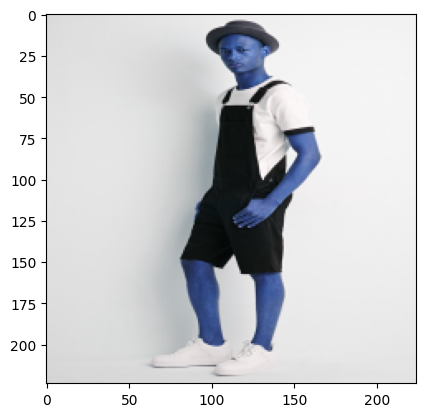

In [ ]:
import matplotlib.pyplot as plt

# Choose a random image from the processed images
processed_image = random.choice(processed_images)

# Display the image
plt.imshow(processed_image)
plt.show()


# ***load_dataset after cleaning***

In [ ]:
import pickle

# Save the lists to a file
with open('/content/drive/MyDrive/text2human/dataset_3.pkl', 'wb') as f:
    pickle.dump((processed_images, new_token), f)


# **start with stable_diffusion**

In [ ]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

Cloning into 'diffusers'...
remote: Enumerating objects: 64281, done.
remote: Counting objects: 100% (794/794), done.
remote: Compressing objects: 100% (430/430), done.
remote: Total 64281 (delta 506), reused 517 (delta 307), pack-reused 63487
Receiving objects: 100% (64281/64281), 47.96 MiB | 27.79 MiB/s, done.
Resolving deltas: 100% (46995/46995), done.
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2209943 sha256=085411f3046cbbbad59d5762c5412f82fc84d00d0a957fc77fd50ce01310d41b
  Stored in directory: /tmp/pip-ephem-wheel-cache-ez7qml60/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.1 MB/s eta 0:00:00
    

In [ ]:
!accelerate config default --mixed_precision fp16

accelerate configuration saved at /root/.cache/huggingface/accelerate/default_config.yaml


In [ ]:
import os

os.environ['MODEL_NAME'] = f'CompVis/stable-diffusion-v1-2'
os.environ['DATASET_NAME'] = f'/content/drive/MyDrive/text2human/dataset_3.pkl'
os.environ['OUTPUT_DIR'] = f'/content/drive/MyDrive/text2human/model'

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

In [ ]:
!accelerate launch diffusers/examples/text_to_image/train_text_to_image.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --dataset_name=$DATASET_NAME \
  --use_ema \
  --resolution=512 --center_crop --random_flip \
  --train_batch_size=1 \
  --gradient_accumulation_steps=4 \
  --gradient_checkpointing \
  --mixed_precision="fp16" \
  --max_train_steps=400 \
  --learning_rate=1e-05 \
  --max_grad_norm=1 \
  --push_to_hub \
  --checkpointing_steps=100000 \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --output_dir=$OUTPUT_DIR

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
2024-06-17 14:52:56.927326: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 14:52:56.927372: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 14:52:57.053731: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] 

In [ ]:
# Stable Diffusion V1
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

model_path = "CompVis/stable-diffusion-v1-2"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt=" a guy wear Black sweatshirt with a zipper").images[0]
image1.save("Product_1.png")

image2 = pipe(prompt=" a guy wear white hoodie with a blue design ").images[0]
image2.save("Product_2.png")

image3 = pipe(prompt="a girl wear stripped hoodie").images[0]
image3.save("Product_3.png")

image4 = pipe(prompt="a girl wear camouflage hoodie ").images[0]
image4.save("Product_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid